Name: Meghana Lokesh

Student id: st20310192

Github repo: https://github.com/meghanalokesh1106/air-quality-analysis

Streamlit app: http://localhost:8501/

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('merged_data.csv')



In [ ]:
# Combine all the datasets into one DataFrame
df = pd.concat([df], ignore_index=True)

# Check the structure of the combined DataFrame
print(df.info())  # Information about data types and missing values
print(df.head())  # View the first few rows of the dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175320 entries, 0 to 175319
Data columns (total 19 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   No        175320 non-null  int64  
 1   year      175320 non-null  int64  
 2   month     175320 non-null  int64  
 3   day       175320 non-null  int64  
 4   hour      175320 non-null  int64  
 5   PM2.5     171488 non-null  float64
 6   PM10      172552 non-null  float64
 7   SO2       171529 non-null  float64
 8   NO2       169794 non-null  float64
 9   CO        164659 non-null  float64
 10  O3        170176 non-null  float64
 11  TEMP      175123 non-null  float64
 12  PRES      175129 non-null  float64
 13  DEWP      175120 non-null  float64
 14  RAIN      175127 non-null  float64
 15  wd        174398 non-null  object 
 16  WSPM      175162 non-null  float64
 17  station   175320 non-null  object 
 18  Category  175320 non-null  object 
dtypes: float64(11), int64(5), object(3)
memory u

In [ ]:
# Create a datetime column using the year, month, day, and hour
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

# Check the first few rows to ensure the datetime column is created correctly
print(df[['year', 'month', 'day', 'hour', 'datetime']].head())


   year  month  day  hour            datetime
0  2013      3    1     0 2013-03-01 00:00:00
1  2013      3    1     1 2013-03-01 01:00:00
2  2013      3    1     2 2013-03-01 02:00:00
3  2013      3    1     3 2013-03-01 03:00:00
4  2013      3    1     4 2013-03-01 04:00:00


In [ ]:
# Check for missing values in each column
print(df.isnull().sum())

# Remove rows with missing values (optional, you can also fill missing values if necessary)
df = df.dropna()

# Remove duplicate rows
df = df.drop_duplicates()

# Check again for missing values
print(df.isnull().sum())

No              0
year            0
month           0
day             0
hour            0
PM2.5        3832
PM10         2768
SO2          3791
NO2          5526
CO          10661
O3           5144
TEMP          197
PRES          191
DEWP          200
RAIN          193
wd            922
WSPM          158
station         0
Category        0
datetime        0
dtype: int64
No          0
year        0
month       0
day         0
hour        0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd          0
WSPM        0
station     0
Category    0
datetime    0
dtype: int64


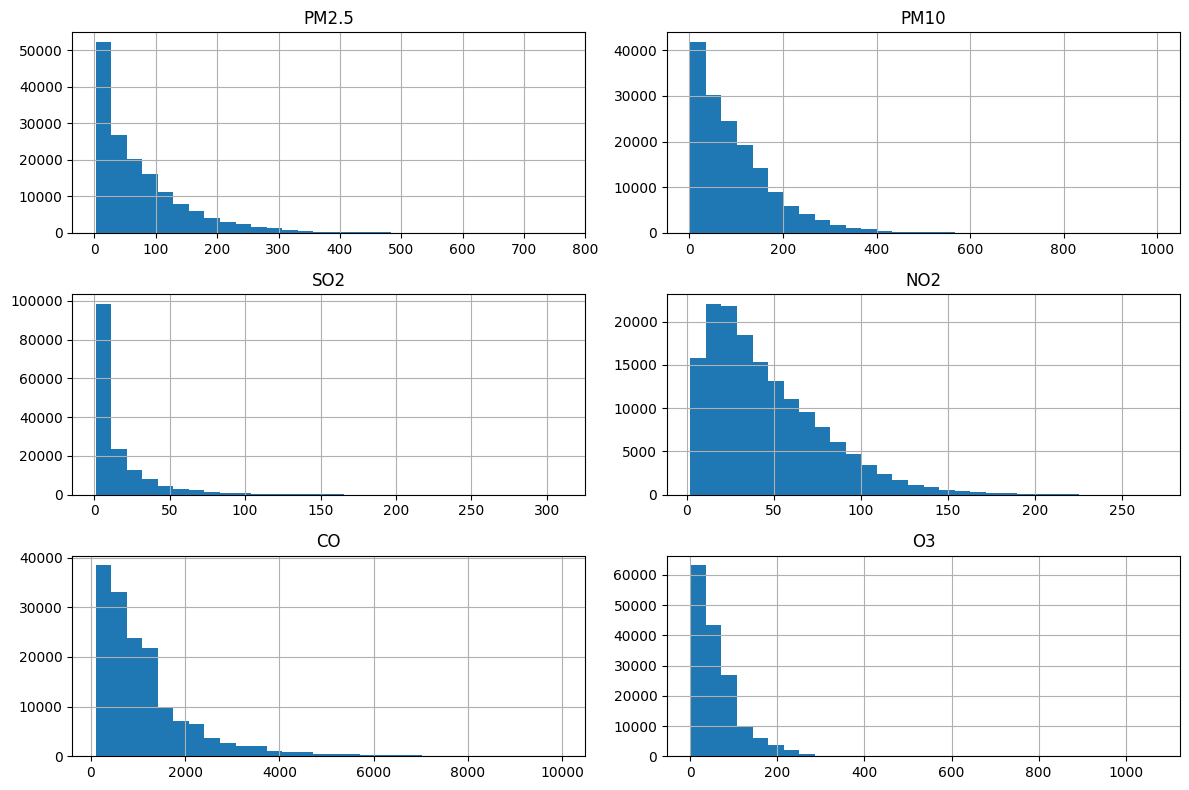

In [ ]:
# Plot histograms for key air quality variables
df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].hist(bins=30, figsize=(12, 8))
plt.tight_layout()
plt.show()

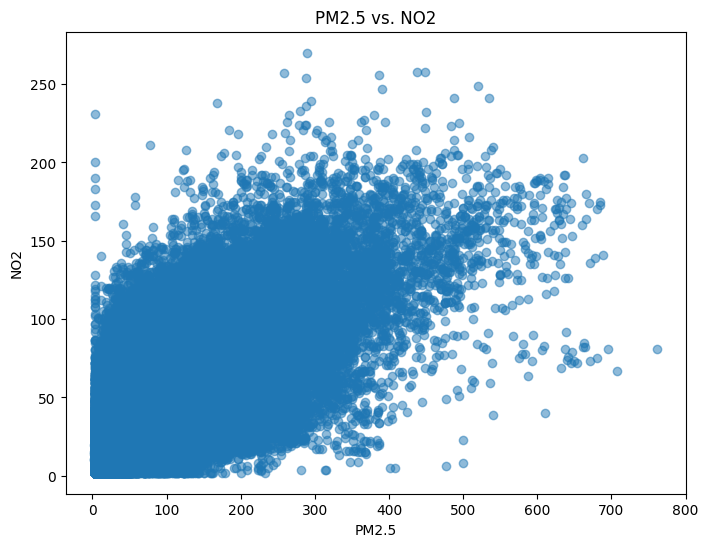

In [ ]:
# Scatter plot for PM2.5 vs. NO2
plt.figure(figsize=(8, 6))
plt.scatter(df['PM2.5'], df['NO2'], alpha=0.5)
plt.title('PM2.5 vs. NO2')
plt.xlabel('PM2.5')
plt.ylabel('NO2')
plt.show()


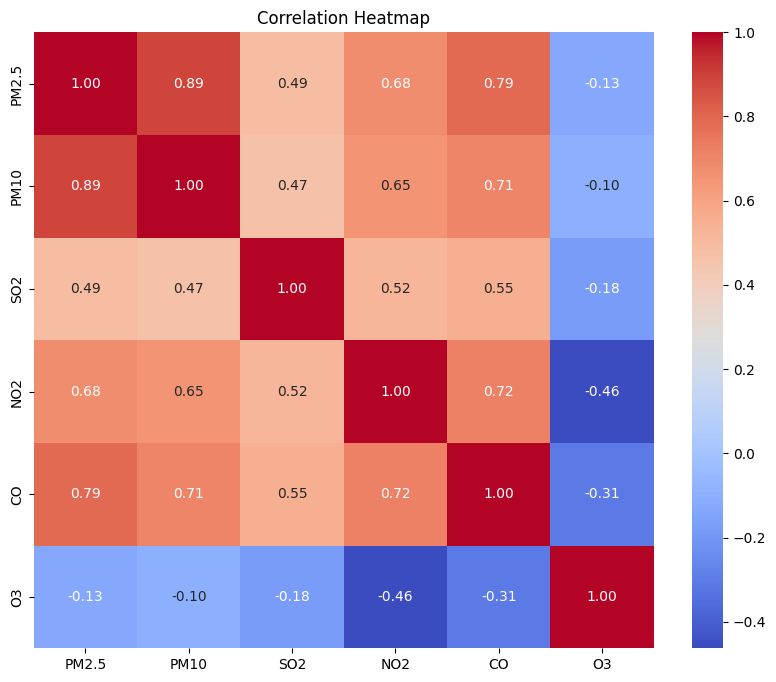

In [ ]:
# Correlation heatmap to visualize relationships between multiple pollutants
correlation_matrix = df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Select features for prediction (e.g., predicting PM2.5)
X = df[['PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'RAIN', 'WSPM']]
y = df['PM2.5']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Evaluate the model
print(f"Training R^2: {model.score(X_train_scaled, y_train)}")
print(f"Test R^2: {model.score(X_test_scaled, y_test)}")


Training R^2: 0.8487047182061289
Test R^2: 0.8511036750411554


In [ ]:
pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 82.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.6 MB/s eta 0:00:00


In [ ]:
import streamlit as st
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Load dataset (make sure the CSV file path is correct)
df = pd.read_csv('merged_data.csv')

# Strip spaces from column names
df.columns = df.columns.str.strip()

# Check column names to confirm
print(df.columns)

# Assuming scaler and model are pre-trained
scaler = StandardScaler()  # Replace with the fitted scaler
model = LinearRegression()  # Replace with the trained model

# Ensure the columns exist
required_columns = ['pm10', 'so2', 'no2', 'co', 'o3', 'temp', 'pres', 'rain']
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    st.write(f"Missing columns: {missing_columns}")
else:
    # Now define sliders for the user inputs
    pm10 = st.slider('PM10', min_value=int(df['pm10'].min()), max_value=int(df['pm10'].max()))
    so2 = st.slider('SO2', min_value=int(df['so2'].min()), max_value=int(df['so2'].max()))
    no2 = st.slider('NO2', min_value=int(df['no2'].min()), max_value=int(df['no2'].max()))
    co = st.slider('CO', min_value=int(df['co'].min()), max_value=int(df['co'].max()))
    o3 = st.slider('O3', min_value=int(df['o3'].min()), max_value=int(df['o3'].max()))
    temp = st.slider('TEMP', min_value=int(df['temp'].min()), max_value=int(df['temp'].max()))
    pres = st.slider('PRES', min_value=int(df['pres'].min()), max_value=int(df['pres'].max()))
    rain = st.slider('RAIN', min_value=int(df['rain'].min()), max_value=int(df['rain'].max()))

    # Input features array (including all 8 features)
    input_features = [[pm10, so2, no2, co, o3, temp, pres, rain]]

    # Scale the input data using the fitted scaler
    input_scaled = scaler.transform(input_features)

    # Predict PM2.5 using the trained model
    predicted_pm25 = model.predict(input_scaled)

    # Display the prediction
    st.write(f"Predicted PM2.5: {predicted_pm25[0]}")

2025-05-10 12:04:26.416 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station',
       'Category'],
      dtype='object')


2025-05-10 12:04:26.676 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-05-10 12:04:26.697 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


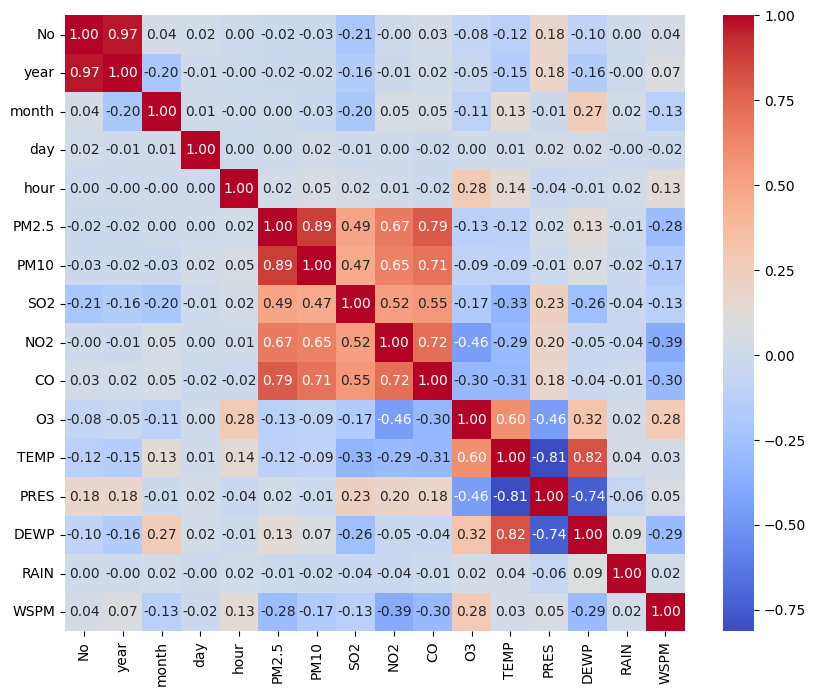

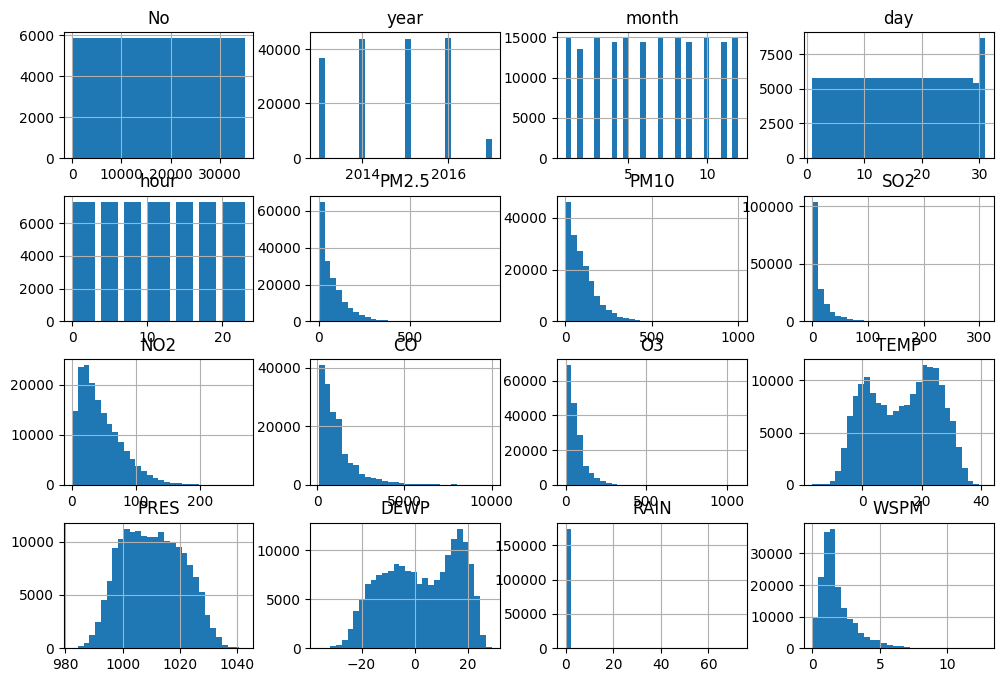

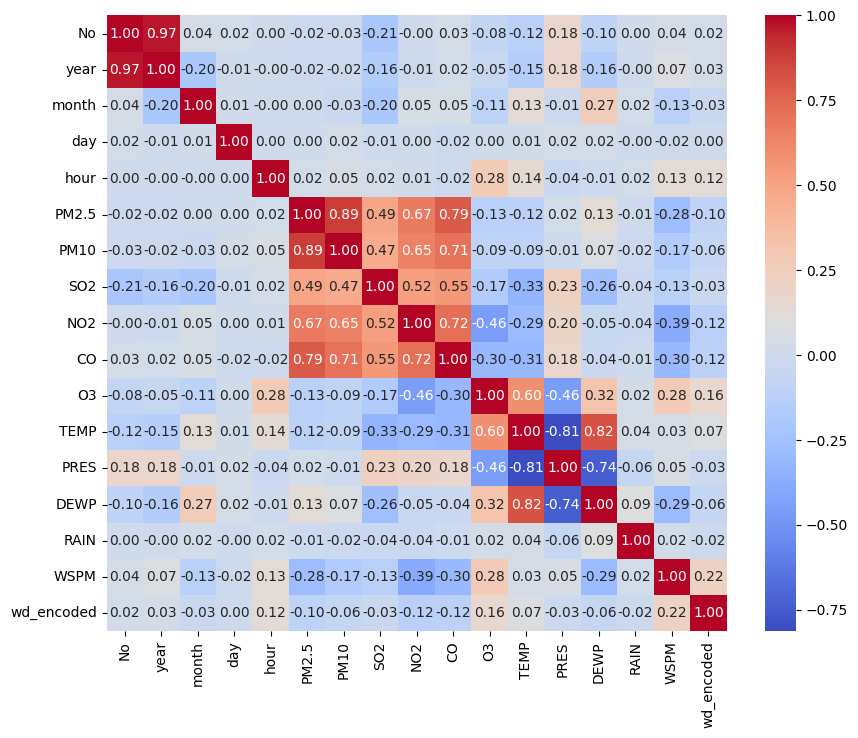

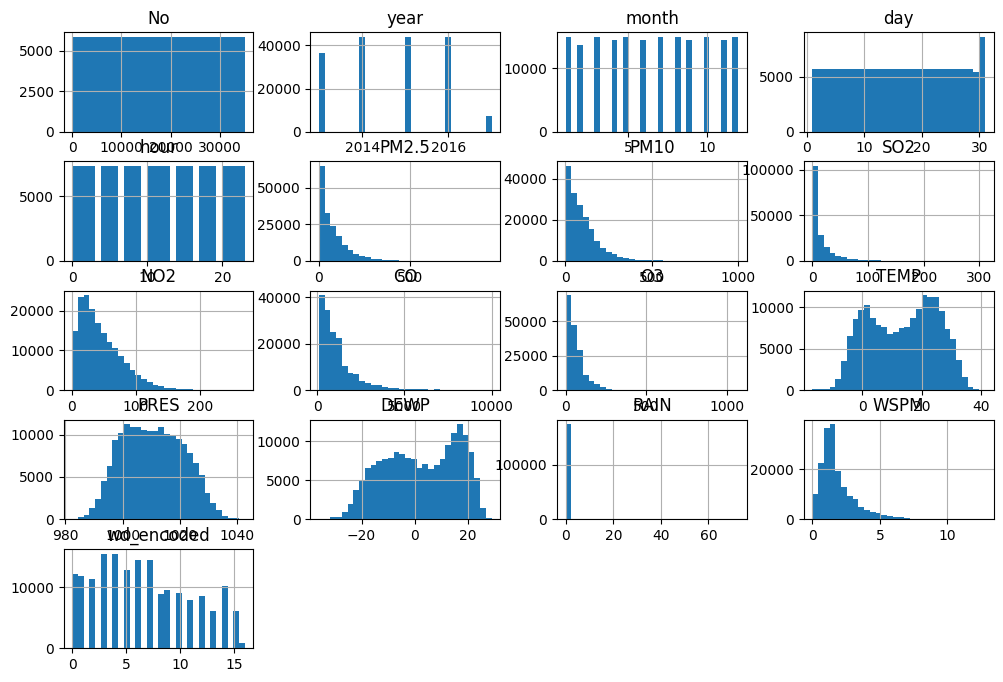

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Select only numeric columns from the dataframe
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix for numeric columns
correlation_matrix = numeric_columns.corr()

# Display the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

# Plot histograms for the numeric columns
numeric_columns.hist(bins=30, figsize=(12, 8))
plt.show()

# Optional: Convert categorical columns like 'wd' to numeric if necessary for analysis
# Encode categorical columns (e.g., wind direction 'wd') using LabelEncoder
encoder = LabelEncoder()
df['wd_encoded'] = encoder.fit_transform(df['wd'])

# Now if you need to include the encoded 'wd_encoded' column in your analysis, you can
numeric_columns_with_encoded = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix again, now including the encoded 'wd' column
correlation_matrix_with_encoded = numeric_columns_with_encoded.corr()

# Display the updated correlation heatmap including the encoded 'wd' column
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_with_encoded, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

# Plot histograms for the updated numeric columns including the encoded 'wd' column
numeric_columns_with_encoded.hist(bins=30, figsize=(12, 8))
plt.show()



In [ ]:
from sklearn.model_selection import train_test_split

X = df[['PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES']]  # Features
y = df['PM2.5']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
df = df.dropna(subset=['PM2.5'])  # assuming PM2.5 is the target column
X = df[['PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES']]  # Features
y = df['PM2.5']  # Target variable

# Split again after dropping NaNs
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")


Mean Absolute Error (MAE): 12.961833051489883
Mean Squared Error (MSE): 464.4296681583053
R-squared: 0.9261296589547102


In [ ]:
print(X_train.isnull().sum())
print(y_train.isnull().sum())

PM10      69
SO2     1324
NO2     2664
CO      6654
O3      2411
TEMP     152
PRES     146
dtype: int64
0


In [ ]:
import pandas as pd

feature_importance = model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame to display feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

  Feature  Importance
0    PM10    0.815153
3      CO    0.094851
1     SO2    0.020718
5    TEMP    0.019208
2     NO2    0.018757
6    PRES    0.016238
4      O3    0.015075


In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming X_train is your training data (features only)
scaler = StandardScaler()
scaler.fit(X_train)  # Fit the scaler on the training data

# Now you can scale the new data
new_data = [[75, 20, 15, 220, 100, 24.5, 1010]]  # Example: [PM10, SO2, NO2, CO, O3, TEMP, PRES]
new_data_scaled = scaler.transform(new_data)  # Apply scaling

# Predict the PM2.5 value
new_prediction = model.predict(new_data_scaled)

print(f"Predicted PM2.5: {new_prediction[0]}")

Predicted PM2.5: 21.45


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 12.961833051489883
Mean Squared Error (MSE): 464.4296681583053
Root Mean Squared Error (RMSE): 21.550630342481988
R-squared (R²): 0.9261296589547102


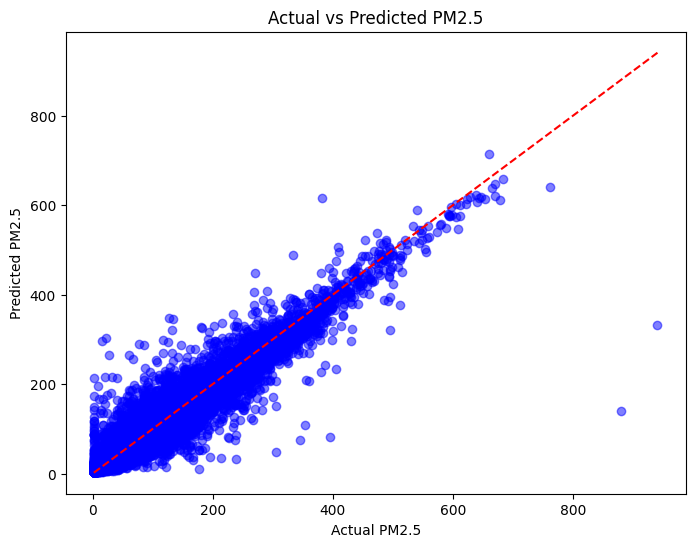

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual PM2.5')
plt.ylabel('Predicted PM2.5')
plt.title('Actual vs Predicted PM2.5')
plt.show()

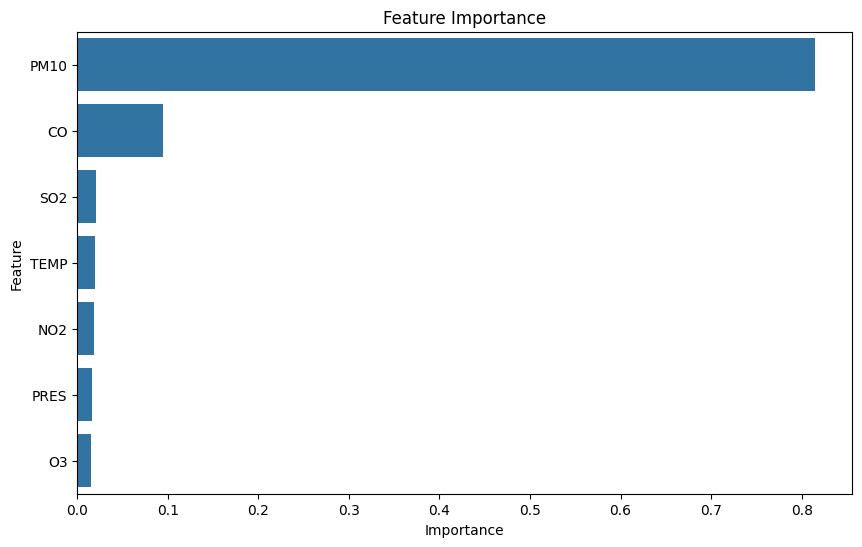

In [ ]:
importances = model.feature_importances_

# Create a DataFrame to visualize the feature importance
feature_names = X_train.columns  # Assuming X_train is a DataFrame with column names
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

In [ ]:
 import joblib

# Save the model
joblib.dump(model, 'pm25_prediction_model.pkl')

# Save the scaler as well (if scaling is used during training)
joblib.dump(scaler, 'scaler.pkl')

# Later on, load the model for predictions
loaded_model = joblib.load('pm25_prediction_model.pkl')
loaded_scaler = joblib.load('scaler.pkl')